In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
import matplotlib.pyplot as plt

# Function to read cryptocurrency data from CSV file
def read_crypto_data(file_path):
    crypto_data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    return crypto_data

# Function to prepare data for LSTM/RNN
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(X), np.array(y)

# Function to create and train LSTM model
def create_lstm_model(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to create and train RNN model
def create_rnn_model(n_steps, n_features):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to forecast cryptocurrency prices using LSTM/RNN
def forecast_model(model, data, n_steps, n_features, epochs=50):
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    # Prepare data for LSTM/RNN
    X, y = prepare_data(scaled_data, n_steps)

    # Reshape input for LSTM/RNN
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # Train the model
    model.fit(X, y, epochs=epochs, batch_size=32)

    # Make predictions
    forecast = []
    for i in range(len(scaled_data) - n_steps, len(scaled_data)):
        input_data = scaled_data[i - n_steps:i, 0]
        input_data = input_data.reshape((1, n_steps, n_features))
        predicted_price = model.predict(input_data)
        forecast.append(predicted_price[0, 0])

    # Inverse transform the predictions
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

    return forecast




In [ ]:
# Example usage
file_path_usd = '/content/drive/MyDrive/Colab Notebooks/stock_data.csv'
file_path_cad = '/content/drive/MyDrive/Colab Notebooks/stock_data_cad.csv'
n_steps = 30  # Number of time steps to consider for each input
n_features = 1  # Number of features (in this case, just the cryptocurrency price)

In [ ]:
# Read cryptocurrency data from CSV file for USD
crypto_data_usd = read_crypto_data(file_path_usd)

# Create and train LSTM model for USD
lstm_model_usd = create_lstm_model(n_steps, n_features)
lstm_forecast_usd = forecast_model(lstm_model_usd, crypto_data_usd, n_steps, n_features)

# Create and train RNN model for USD
rnn_model_usd = create_rnn_model(n_steps, n_features)
rnn_forecast_usd = forecast_model(rnn_model_usd, crypto_data_usd, n_steps, n_features)


# Read cryptocurrency data from CSV file for CAD
crypto_data_cad = read_crypto_data(file_path_cad)

# Create and train LSTM model for CAD
lstm_model_cad = create_lstm_model(n_steps, n_features)
lstm_forecast_cad = forecast_model(lstm_model_cad, crypto_data_cad, n_steps, n_features)

# Create and train RNN model for CAD
rnn_model_cad = create_rnn_model(n_steps, n_features)
rnn_forecast_cad = forecast_model(rnn_model_cad, crypto_data_cad, n_steps, n_features)

Epoch 1/50
68/68 [==============================] - 4s 15ms/step - loss: 0.0180
Epoch 2/50
68/68 [==============================] - 1s 15ms/step - loss: 0.0164
Epoch 3/50
68/68 [==============================] - 1s 15ms/step - loss: 0.0154
Epoch 4/50
68/68 [==============================] - 1s 15ms/step - loss: 0.0142
Epoch 5/50
68/68 [==============================] - 2s 24ms/step - loss: 0.0128
Epoch 6/50
68/68 [==============================] - 2s 25ms/step - loss: 0.0114
Epoch 7/50
68/68 [==============================] - 2s 24ms/step - loss: 0.0104
Epoch 8/50
68/68 [==============================] - 2s 25ms/step - loss: 0.0102
Epoch 9/50
68/68 [==============================] - 2s 22ms/step - loss: 0.0110
Epoch 10/50
68/68 [==============================] - 1s 16ms/step - loss: 0.0111
Epoch 11/50
68/68 [==============================] - 1s 17ms/step - loss: 0.0089
Epoch 12/50
68/68 [==============================] - 1s 16ms/step - loss: 0.0081
Epoch 13/50
68/68 [==================

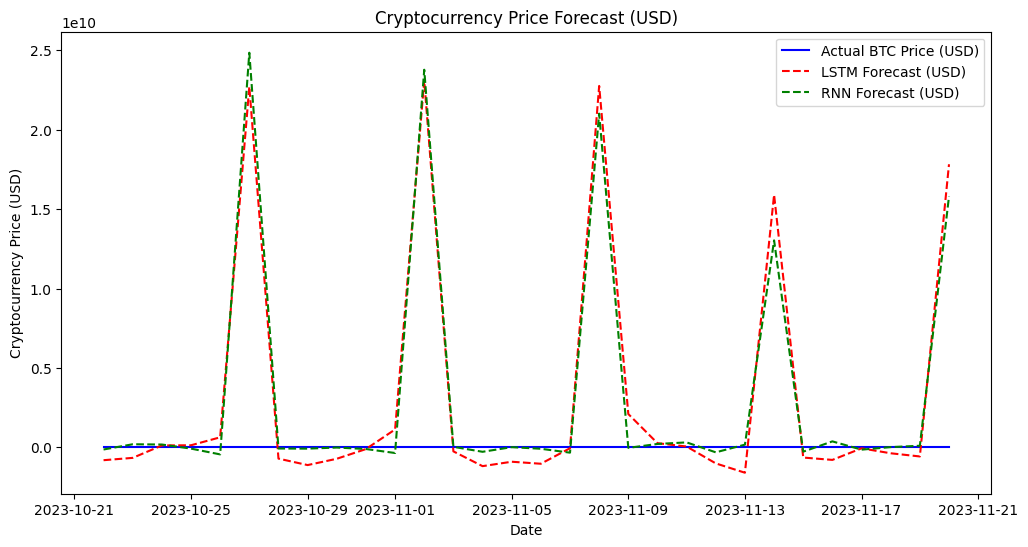

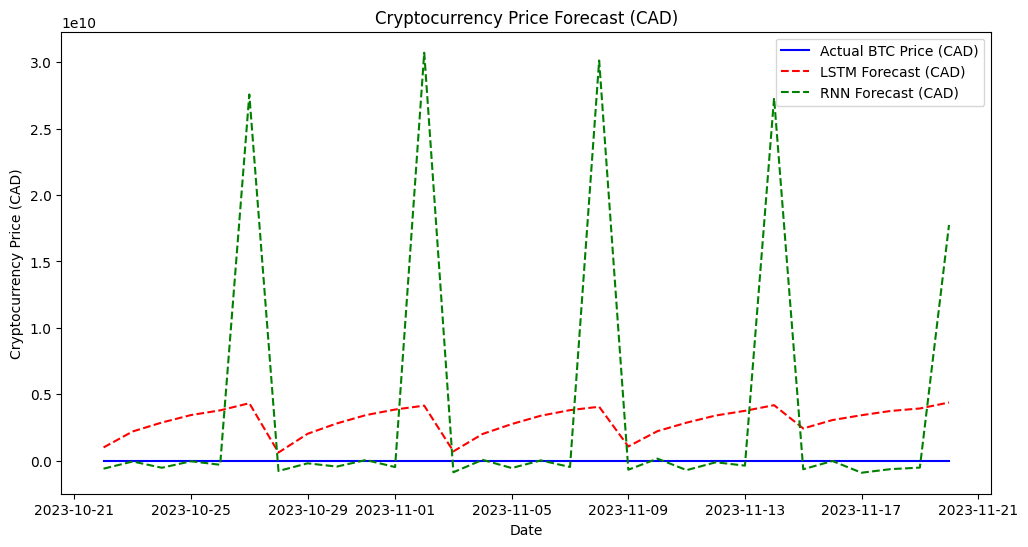

In [ ]:

# Plotting for Bitcoin in USD
plt.figure(figsize=(12, 6))

# Plot actual cryptocurrency prices
plt.plot(crypto_data_usd.index[-len(lstm_forecast_usd):], crypto_data_usd['Close'].tail(len(lstm_forecast_usd)), label='Actual BTC Price (USD)', color='blue')

# Plot LSTM forecast
plt.plot(crypto_data_usd.index[-len(lstm_forecast_usd):], lstm_forecast_usd, label='LSTM Forecast (USD)', color='red', linestyle='--')

# Plot RNN forecast
plt.plot(crypto_data_usd.index[-len(rnn_forecast_usd):], rnn_forecast_usd, label='RNN Forecast (USD)', color='green', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Cryptocurrency Price (USD)')
plt.legend()
plt.title('Cryptocurrency Price Forecast (USD)')
plt.show()

# Plotting for Bitcoin in CAD
plt.figure(figsize=(12, 6))

# Plot actual cryptocurrency prices
plt.plot(crypto_data_cad.index[-len(lstm_forecast_cad):], crypto_data_cad['Close'].tail(len(lstm_forecast_cad)), label='Actual BTC Price (CAD)', color='blue')

# Plot LSTM forecast
plt.plot(crypto_data_cad.index[-len(lstm_forecast_cad):], lstm_forecast_cad, label='LSTM Forecast (CAD)', color='red', linestyle='--')

# Plot RNN forecast
plt.plot(crypto_data_cad.index[-len(rnn_forecast_cad):], rnn_forecast_cad, label='RNN Forecast (CAD)', color='green', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Cryptocurrency Price (CAD)')
plt.legend()
plt.title('Cryptocurrency Price Forecast (CAD)')
plt.show()